## MLE Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### First, the Least Squares Method:

The more well known method for finding the linear regression coefficients is called **least squares**.

Let $\mathbf{X}$ be our (tall) features matrix of size ($m \times n$) with $m > n$, and $\mathbf{y}$ the vector containing the target variables of dimension $m$, we assume a linear relationship between them.

Let $\mathbf{\tilde{X}} := (\mathbf{X}\;|\;\mathbf{\vec{1}})$, the augmented \{$m \times (n+1)$\} matrix, using it instead of the original $\mathbf{X}$ will prevent us from having to use an additional vector for storing the bias terms.

Then, we want to find a vector of coeficients $\mathbf{w}$ such that $$\mathbf{\tilde{X}w} = \mathbf{y}$$

In practice, this is impossible since $\mathbf{y}$ will always be measured with some noise $\vec{\epsilon}$: $$\mathbf{\tilde{X}w} + \vec{\epsilon} = \mathbf{y}$$ 

Finding $\mathbf{w}$ such that it minimizes $||\vec{\epsilon}||^2$ would give us $$\mathbf{\tilde{X}w} = \mathbf{{y} - \vec{\epsilon}} \;\text{,}\; \mathbf{\tilde{X}w} \simeq \mathbf{y}$$

Since $\vec{\epsilon} = \mathbf{\tilde{X}w} - \mathbf{y}$, we find the solution by minimizing the sum of squared errors $$\frac{\partial}{\partial \mathbf{w}} ||\mathbf{\tilde{X}w - \mathbf{{y}}}||^2 = 0$$
$$2\mathbf{\tilde{X}}^T(\mathbf{\tilde{X}w} - \mathbf{{y}}) = 0$$
$$(\mathbf{\tilde{X}}^T\mathbf{\tilde{X}})^{-1} \mathbf{\tilde{X}}^T \mathbf{{y}} = \mathbf{w}$$

### Implementation:

w0 = 3, w1 = 1


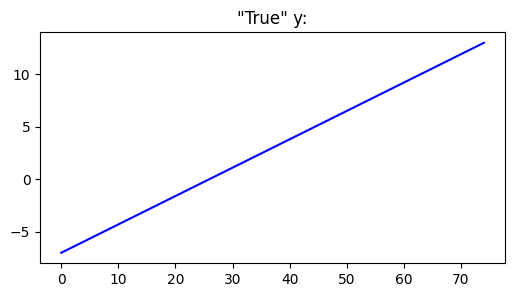

In [2]:
# defining our linear relationship

n = 75 # number of data points

x = np.linspace(-10, 10, n)

w0, w1 = np.random.randint(1, 5, 2)

print(f'w0 = {w0}, w1 = {w1}')

y = w0 + (w1 * x)

plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), y, color='blue')
plt.title('"True" y:'); None

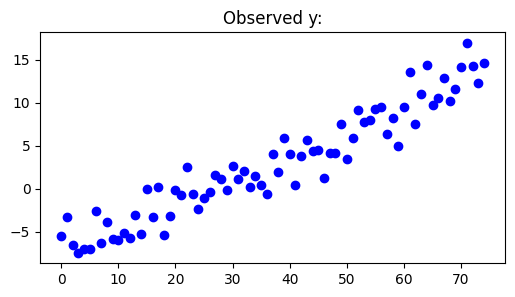

In [3]:
# adding noise 

noise = np.random.normal(size=n, scale=2)
y += noise

plt.figure(figsize=(6, 3))
plt.scatter(list(range(n)), y, color='blue')
plt.title('Observed y:'); None

In [4]:
# augmenting X

X = np.array([x, np.ones(n)]).T
X.shape

(75, 2)

In [5]:
def least_squares(X, y):
    assert X.shape[0] == len(y)
    # least squares formula, using the Moore-Penrose pseudo-inverse
    return np.linalg.pinv(X.T @ X) @ X.T @ y

coefs = least_squares(X, y)
print(f'coefs: w1 ~= {coefs[0]:.1f}, w0 ~= {coefs[1]:.1f}')

coefs: w1 ~= 1.0, w0 ~= 3.0


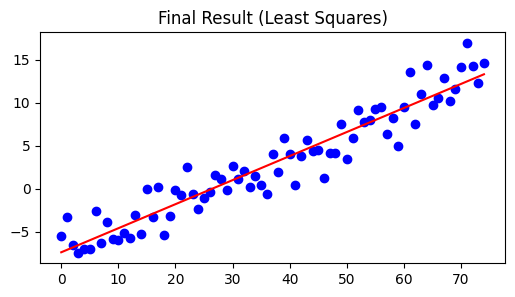

In [6]:
plt.figure(figsize=(6, 3))
plt.plot(list(range(n)), X @ coefs, color='red')
plt.scatter(list(range(n)), y, color='blue')
plt.title('Final Result (Least Squares)'); None

### The Maximum Likelihood Estimation: 

The method we are going to derive here is based on **estimating the parameters of a continuous probability distribution**, namely the **Gaussian (Normal) distribution**.

It's probability density function (PDF) is given by:
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{ \exp{(\frac{(x-\mu)^2}{2\sigma^2})} }{\sqrt{2\pi\sigma^2}}$$

***Let's see how we can use it to fit a linear regression model.***

Assume a data set consisting of a vector of $N$ observations $\mathbf{x}$ i.i.d (independently and identically distributed) of some random variable $X \sim \mathcal{N}(\mu, \sigma^2)$, we can then write the **probability of the data set (likelihood function)** to be
$$p(\mathbf{x} | \mu, \sigma^2) = \prod_{i=1}^{N} \mathcal{N}(x_i | \mu, \sigma^2)$$

*Note that here instead of working with a matrix of $m$ features, we start with observations of a single feature $x$ for simplicity. We will expand our vector to a matrix later.*

Finding the parameters that maximize this product is what we call Maximum Likelihood Estimation.

In the context of linear regression, we will assume that given $\mathbf{x}$, the target vector $\mathbf{y}$ has a Gaussian distribution with, for each $x_i$, the corresponding mean $\mu_i$ is given by $$\mu_i = f(x_i, \mathbf{w}) = w_0 + x_iw_1$$ and variance constant for all data points. 

Finding $\mathbf{w}$ and $\sigma^2$ would allow us to make predictions on unseen data, and is the equivalent of finding $\mathbf{w}$ for Least Squares. 

Therefore, we are looking for $\mathbf{w}$ and $\sigma^2$ that **maximize**
$$p(\mathbf{y} | \mathbf{x}, \mathbf{w}, \sigma^2) = \prod_{i=1}^{N} \mathcal{N}(y_i | f(x_i, \mathbf{w}), \sigma^2)$$

The most commonly used approach to find these parameters is to work with the logarithm of the MLE:

$$\ln p(\mathbf{y} | \mathbf{x}, \mathbf{w}, \sigma^2) = \frac{-1}{2\sigma^2} \sum^{N}_{i = 1} \Bigl(f(x_i, \mathbf{w}) - y_i\Bigr)^2 - \frac{N}{2}\ln(\sigma^2) - \frac{N}{2} \ln(2\pi)$$

Let's start by finding the MLE solution for $\mathbf{w}$, that we will call $\mathbf{w_{ml}}$.

Is simplifies to maximizing $\frac{-1}{2}\sum_{i=1}^{N}\Bigl( (w_0 + x_iw_1) - y_i \Bigr)^2$
or minimizing $L = \frac{1}{2}\sum_{i=1}^{N}\Bigl( y_i - (w_0 + x_iw_1) \Bigr)^2$.

And we see that we are once again minimizing the sum of squared errors.

Taking the derivative with respect to $w_0$:
$$
\frac{\partial L}{\partial w_0} = \frac{1}{2} \sum_{i = 1}^{N} \frac{\partial}{\partial w_0} \Bigl( y_i - (w_0 + x_iw_1) \Bigr)^2 =  \sum_{i = 1}^{N} y_i - (w_0 + x_iw_1)
$$

To minimize with respect to $w_0$, we set the derivative equal to $0$:

$$
\frac{\partial L}{\partial w_0} = 0
$$
$$
\sum_{i = 1}^{N} y_i - (w_0 + x_iw_1) = 0
$$
$$
-Nw_0  = - \sum_{i = 1}^{N} x_iw_1 - \sum_{i = 1}^{N}y_i
$$
$$
Nw_0  = \sum_{i = 1}^{N}y_i - w_1\sum_{i = 1}^{N}x_i
$$
$$
w_0  = \frac{1}{N} \Bigl(\sum_{i = 1}^{N}y_i - w_1\sum_{i = 1}^{N}x_i \Bigr) = \bar{\mathbf{y}} - w_1\bar{\mathbf{x}}$$

Where $\bar{\mathbf{v}}$ denotes the mean over the values of $\mathbf{v}$, giving us the first element of the vector $\mathbf{w_ml}$.